In [4]:
import json

import matplotlib.pyplot as plt
import osmnx as ox 
import pandas as pd
import numpy as np

In [5]:
with open('./data/matched-50-results.json', 'r') as f:
    match_results = json.load(f)
print(len(match_results))

for i, r in enumerate(match_results):
    if not r['MATCHED_RESULTS']['Matched_path']:
        del match_results[i]
print(len(match_results))

50
47


/var/folders/dp/s0yrnsjd53183c4qhlp4q4n80000gn/T/ipykernel_11980/3455750950.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, c=colors[i], marker='x', s=15)


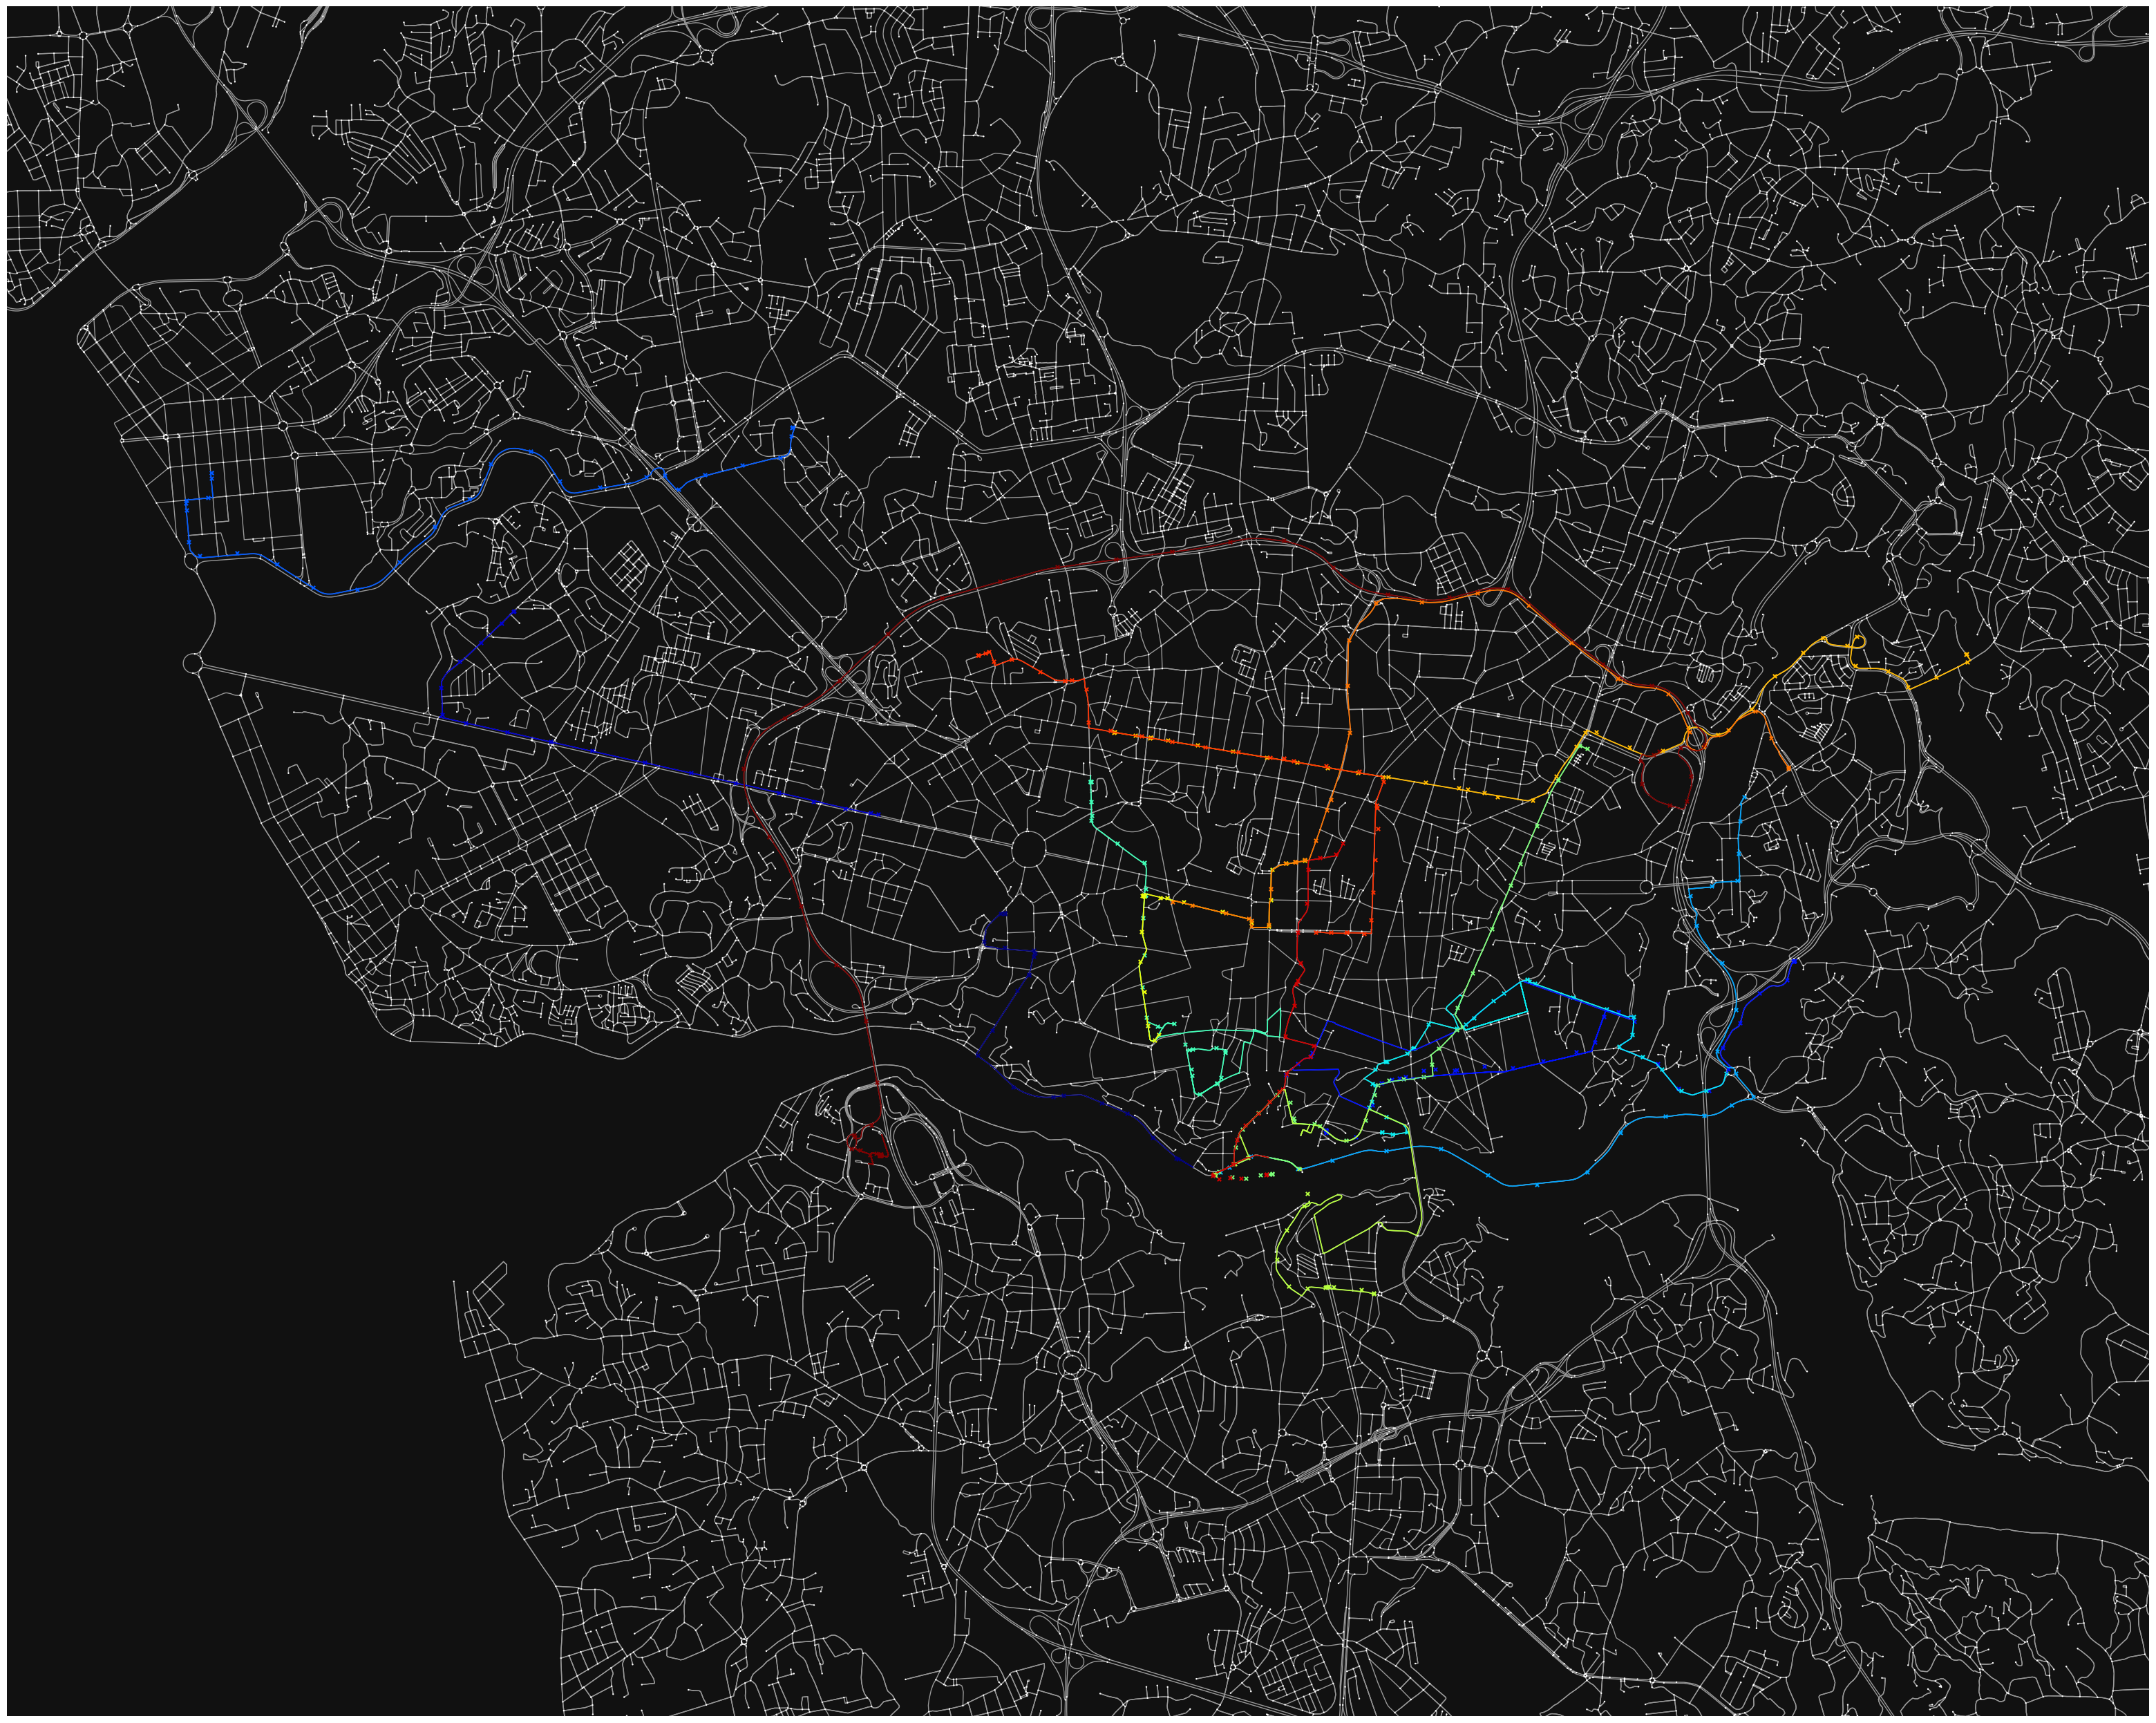

In [6]:
G = ox.io.load_graphml(filepath="./data/Porto, Portugal/porto.graphml")
fig, ax = ox.plot_graph(G, node_size=3, figsize=(40, 40), edge_linewidth=1, show=False)

x_min, x_max = 9999, -9999
y_min, y_max = 9999, -9999 

colors = plt.cm.jet(np.linspace(0, 1, 15))  

for i in range(15):
    gps_points = match_results[i]['POLYLINE']


    mgeom = [[float(j) for j in i.split(' ')] for i in match_results[i]['MATCHED_RESULTS']['Matched_geometry'][11:-1].split(',')]
    ax.plot([i[0] for i in mgeom], [i[1] for i in mgeom], c=colors[i], linewidth=1.25)
    
    x_min = min(x_min, min([i[0] for i in mgeom]))
    x_max = max(x_max, max([i[0] for i in mgeom]))
    y_min = min(y_min, min([i[1] for i in mgeom]))
    y_max = max(y_max, max([i[1] for i in mgeom]))

    x, y = zip(*gps_points)
    ax.scatter(x, y, c=colors[i], marker='x', s=15)

x_mid, y_mid = (x_max+x_min)/2, (y_max+y_min)/2
x_gap = (x_max - x_min) * 0.6
y_gap = (y_max - y_min) * 0.6
if x_gap > y_gap:
    y_gap = max(y_gap, x_gap * 0.6)
else:
    x_gap = max(x_gap, y_gap)

ax.set_xlim(x_mid - x_gap, x_mid + x_gap)
ax.set_ylim(y_mid - y_gap, y_mid + y_gap)

fig.savefig('./data/matched_routes.png', dpi=320)
plt.show()